In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv


# **Preparing the dataset**

In [3]:

# Pandas and NumPy Libraries
import numpy as np
import pandas as pd
# Standard Library
import os 
# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Random Library to create missing data randomly
import random

In [4]:
# We included the dataset into the notebook.
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv")
df = df_.copy()

In [5]:
# We created random missing values in the dataset.
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.03,
                              seed: random = 54) -> pd.DataFrame:

# Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)


# **Data overview and inspection**

In [6]:
df.head(n=5) # First 5 rows

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NaN,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79.0,3163.0,956.0,1665.0,0.0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82.0,3126.0,788.0,1696.0,95.0,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82.0,2947.0,752.0,1476.0,2.0,...,NaN,6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70.0,2853.0,729.0,1733.0,89.0,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,NaN,NaN
4,NaN,1999 - 2000,Regular_Season,Gary Payton,SEA,82.0,3425.0,747.0,1666.0,177.0,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [7]:
df.tail(n=5) # Last 5 rows

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15.0,127.0,7.0,28.0,2.0,...,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10.0,81.7,5.0,16.0,4.0,...,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16.0,124.7,1.0,15.0,0.0,...,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12.0,59.2,0.0,8.0,0.0,...,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN
53948,Ukrainian-Superleague,2019 - 2020,International,Dmitriy Lypovtsev,KHAR,5.0,86.3,1.0,13.0,0.0,...,"Oct 10, 1986",6-8,203.0,220.0,100.0,Ukraine,NaN,NaN,NaN,NaN


In [8]:
df.sample(n=5) # Random 5 rows

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
9930,Eurocup,2009 - 2010,International,Marcus Norris,GCN,14.0,301.8,36.0,93.0,18.0,...,"Aug 20, 1974",6-1,185.0,175.0,79.0,United States,Jackson High School,NaN,NaN,NaN
11478,Euroleague,2010 - 2011,International,Joseph Gomis,SPI,10.0,302.6,41.0,103.0,11.0,...,"Jul 2, 1978",5-11,180.0,167.0,76.0,France,NaN,NaN,NaN,NaN
13738,Euroleague,2011 - 2012,International,David Andersen,SANA,20.0,513.7,87.0,199.0,12.0,...,"Jun 23, 1980",7-0,213.0,242.0,110.0,Australia,Australian Institute of Sport,2.0,8.0,Atlanta Hawks
34291,French-Jeep-Elite,2016 - 2017,International,Mykal Riley,NAN,36.0,902.0,107.0,263.0,38.0,...,"Jul 14, 1985",6-6,198.0,180.0,NaN,United States,Pine Bluff High School,NaN,NaN,NaN
37635,Chinese-CBA,2017 - 2018,International,Miroslav Raduljica,JIA,NaN,1290.9,328.0,620.0,6.0,...,"Jan 5, 1988",7-0,213.0,250.0,113.0,Serbia,NaN,NaN,NaN,NaN


# **Basic informations**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       52409 non-null  object 
 1   Season       52281 non-null  object 
 2   Stage        52348 non-null  object 
 3   Player       52340 non-null  object 
 4   Team         52386 non-null  object 
 5   GP           52339 non-null  float64
 6   MIN          52321 non-null  float64
 7   FGM          52254 non-null  float64
 8   FGA          52412 non-null  float64
 9   3PM          52357 non-null  float64
 10  3PA          52393 non-null  float64
 11  FTM          52395 non-null  float64
 12  FTA          52384 non-null  float64
 13  TOV          52370 non-null  float64
 14  PF           52345 non-null  float64
 15  ORB          52351 non-null  float64
 16  DRB          52379 non-null  float64
 17  REB          52315 non-null  float64
 18  AST          52385 non-null  float64
 19  STL 

***We wanted to see the data types of our columns. Later, we will perform an analysis based on those data types.***

In [10]:
df.describe()
# Provides basic statistics of numerical columns (mean, median, standard deviation, etc.)

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg,draft_round,draft_pick
count,52339.000000,52321.000000,52254.000000,52412.000000,52357.000000,52393.000000,52395.000000,52384.000000,52370.000000,52345.000000,...,52385.000000,52340.000000,52330.000000,52274.000000,52092.000000,52311.000000,47863.000000,47871.000000,9854.000000,9835.000000
mean,30.327805,752.697852,113.200942,245.092116,28.476192,80.786059,56.268881,76.030773,47.249780,70.028198,...,62.780853,26.711903,10.489834,310.798255,1986.362013,197.440538,210.328542,95.418270,1.388878,14.060905
std,17.846670,534.288340,100.130534,212.026522,30.670882,80.724602,59.211911,76.298353,37.395752,45.560174,...,73.154131,22.092883,18.216378,271.522031,6.634750,8.726485,26.149182,11.863065,0.505307,8.641450
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1961.000000,160.000000,130.000000,59.000000,1.000000,1.000000
25%,17.000000,381.000000,48.000000,109.000000,6.000000,20.000000,20.000000,28.000000,21.000000,37.000000,...,20.000000,11.000000,1.000000,134.000000,1982.000000,191.000000,190.000000,86.000000,1.000000,6.000000
50%,29.000000,663.400000,89.000000,196.000000,20.000000,61.000000,40.000000,56.000000,39.000000,64.000000,...,41.000000,21.000000,4.000000,247.000000,1987.000000,198.000000,209.000000,95.000000,1.000000,13.000000
75%,37.000000,954.700000,145.000000,310.000000,41.000000,117.000000,73.000000,99.000000,63.000000,91.000000,...,78.000000,35.000000,12.000000,399.000000,1991.000000,203.000000,229.000000,104.000000,2.000000,22.000000
max,85.000000,3485.000000,978.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,464.000000,344.000000,...,925.000000,225.000000,307.000000,2832.000000,2004.000000,229.000000,375.000000,170.000000,7.000000,30.000000


In [11]:
df.shape # row, column

(53949, 34)

In [12]:
df.columns # Column names

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')

In [13]:
df.dtypes # Data types of the columns

League          object
Season          object
Stage           object
Player          object
Team            object
GP             float64
MIN            float64
FGM            float64
FGA            float64
3PM            float64
3PA            float64
FTM            float64
FTA            float64
TOV            float64
PF             float64
ORB            float64
DRB            float64
REB            float64
AST            float64
STL            float64
BLK            float64
PTS            float64
birth_year     float64
birth_month     object
birth_date      object
height          object
height_cm      float64
weight         float64
weight_kg      float64
nationality     object
high_school     object
draft_round    float64
draft_pick     float64
draft_team      object
dtype: object

# **Missing data analysis**

In [14]:
df.isnull().sum()

League          1540
Season          1668
Stage           1601
Player          1609
Team            1563
GP              1610
MIN             1628
FGM             1695
FGA             1537
3PM             1592
3PA             1556
FTM             1554
FTA             1565
TOV             1579
PF              1604
ORB             1598
DRB             1570
REB             1634
AST             1564
STL             1609
BLK             1619
PTS             1675
birth_year      1857
birth_month     1902
birth_date      1821
height          1650
height_cm       1638
weight          6086
weight_kg       6078
nationality     1590
high_school    30937
draft_round    44095
draft_pick     44114
draft_team     44093
dtype: int64

***Draft, also known as NBA selections, is evident in the last 3 categories, resulting in a lot of missing data since the draft system only exists in the NBA, and players from "high_school" (college teams) are also transferred to NBA teams through the draft, leading to significant missing data in college teams as well.***

In [15]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

League          2.854548
Season          3.091809
Stage           2.967618
Player          2.982446
Team            2.897181
GP              2.984300
MIN             3.017665
FGM             3.141856
FGA             2.848987
3PM             2.950935
3PA             2.884205
FTM             2.880498
FTA             2.900888
TOV             2.926838
PF              2.973178
ORB             2.962057
DRB             2.910156
REB             3.028786
AST             2.899034
STL             2.982446
BLK             3.000982
PTS             3.104784
birth_year      3.442140
birth_month     3.525552
birth_date      3.375410
height          3.058444
height_cm       3.036201
weight         11.281025
weight_kg      11.266196
nationality     2.947228
high_school    57.344900
draft_round    81.734601
draft_pick     81.769820
draft_team     81.730894
dtype: float64


***We calculated what percentage of the total data is missing for each variable.***

In [16]:
df.isnull().sum().sum() # Total number of missing values

221031

In [17]:
df.notnull().sum() # Number of non-missing values in each variable

League         52409
Season         52281
Stage          52348
Player         52340
Team           52386
GP             52339
MIN            52321
FGM            52254
FGA            52412
3PM            52357
3PA            52393
FTM            52395
FTA            52384
TOV            52370
PF             52345
ORB            52351
DRB            52379
REB            52315
AST            52385
STL            52340
BLK            52330
PTS            52274
birth_year     52092
birth_month    52047
birth_date     52128
height         52299
height_cm      52311
weight         47863
weight_kg      47871
nationality    52359
high_school    23012
draft_round     9854
draft_pick      9835
draft_team      9856
dtype: int64

In [18]:
df.notnull().sum().sum() # Total number of non-missing values

1613235

In [19]:
df.nunique() # Returns the number of unique values in each column

League            49
Season            21
Stage              3
Player         14436
Team             793
GP                85
MIN            15859
FGM              753
FGA             1437
3PM              257
3PA              582
FTM              540
FTA              650
TOV              316
PF               311
ORB              326
DRB              678
REB              885
AST              636
STL              189
BLK              220
PTS             1765
birth_year        44
birth_month       12
birth_date      7453
height            28
height_cm         28
weight           160
weight_kg         83
nationality      534
high_school     3079
draft_round        5
draft_pick        30
draft_team        35
dtype: int64

In [20]:
df.duplicated().sum() # Returns the number of duplicate rows in the dataset

0

In [21]:
df[df.notnull().all(axis = 1)] # Retrieved records with no missing values

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
5,NBA,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82.0,3148.0,619.0,1447.0,83.0,...,"Nov 5, 1974",6-6,198.0,218.0,99.0,United States,Oak Hill Academy,1.0,3.0,Philadelphia Sixers
10,NBA,1999 - 2000,Regular_Season,Ray Allen,MIL,82.0,3070.0,642.0,1411.0,172.0,...,"Jul 20, 1975",6-5,196.0,205.0,93.0,United States,Hillcrest High School,1.0,5.0,Minnesota Timberwolves
11,NBA,1999 - 2000,Regular_Season,Alonzo Mourning,MIA,79.0,2748.0,652.0,1184.0,0.0,...,"Feb 8, 1970",6-10,208.0,240.0,109.0,United States,Indian River High School,1.0,2.0,Charlotte Hornets
12,NBA,1999 - 2000,Regular_Season,Tim Duncan,SAS,74.0,2875.0,628.0,1281.0,1.0,...,"Apr 25, 1976",6-11,211.0,250.0,113.0,United States,St. Dunstan's Episcopal High School,1.0,1.0,San Antonio Spurs
17,NBA,1999 - 2000,Regular_Season,Elton Brand,CHI,81.0,2999.0,630.0,1306.0,0.0,...,"Mar 11, 1979",6-9,206.0,254.0,115.0,United States,Peekskill High School,1.0,1.0,Chicago Bulls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53384,Spanish-ACB,2019 - 2020,International,Toney Douglas,EST,11.0,225.4,31.0,101.0,15.0,...,"Mar 16, 1986",6-2,188.0,195.0,88.0,United States,Jonesboro High School,1.0,29.0,Los Angeles Lakers
53732,Turkish-BSL,2019 - 2020,International,D.J. White,TOF,20.0,442.8,62.0,122.0,24.0,...,"Aug 31, 1986",6-9,206.0,250.0,113.0,United States,Hillcrest High School,1.0,29.0,Detroit Pistons
53746,Turkish-BSL,2019 - 2020,International,R.J. Hunter,TUR,16.0,392.6,53.0,140.0,27.0,...,"Oct 24, 1993",6-6,198.0,190.0,86.0,United States,Pike High School,1.0,28.0,Boston Celtics
53762,Turkish-BSL,2019 - 2020,International,Shane Larkin,EFE,10.0,237.1,43.0,100.0,19.0,...,"Oct 2, 1992",5-11,180.0,175.0,79.0,United States / Turkey,Dr. Phillips High School,1.0,18.0,Atlanta Hawks


In [22]:
df.select_dtypes(include=['number']) # Filtered columns containing only numerical data

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg,draft_round,draft_pick
0,79.0,3163.0,956.0,1665.0,0.0,1.0,432.0,824.0,223.0,255.0,...,299.0,36.0,239.0,2344.0,1972.0,216.0,325.0,147.0,1.0,1.0
1,82.0,3126.0,788.0,1696.0,95.0,236.0,436.0,NaN,178.0,263.0,...,322.0,110.0,92.0,2107.0,1977.0,198.0,220.0,100.0,1.0,5.0
2,82.0,2947.0,752.0,1476.0,2.0,8.0,589.0,739.0,231.0,229.0,...,304.0,79.0,71.0,2095.0,1963.0,206.0,265.0,120.0,1.0,13.0
3,70.0,2853.0,729.0,1733.0,89.0,261.0,NaN,620.0,230.0,162.0,...,328.0,144.0,5.0,1989.0,1975.0,183.0,165.0,75.0,1.0,NaN
4,82.0,3425.0,747.0,1666.0,177.0,520.0,311.0,423.0,224.0,178.0,...,732.0,153.0,18.0,1982.0,1968.0,193.0,180.0,82.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,15.0,127.0,7.0,28.0,2.0,13.0,3.0,4.0,5.0,27.0,...,8.0,1.0,3.0,19.0,1995.0,198.0,182.0,83.0,NaN,NaN
53945,10.0,81.7,5.0,16.0,4.0,14.0,1.0,3.0,3.0,2.0,...,3.0,0.0,0.0,15.0,1991.0,191.0,187.0,85.0,NaN,NaN
53946,16.0,124.7,1.0,15.0,0.0,11.0,7.0,14.0,11.0,12.0,...,10.0,6.0,1.0,9.0,1994.0,188.0,200.0,91.0,NaN,NaN
53947,12.0,59.2,0.0,8.0,0.0,7.0,3.0,6.0,5.0,6.0,...,3.0,1.0,0.0,3.0,1993.0,188.0,171.0,78.0,NaN,NaN


In [23]:
df.select_dtypes(include=['object']) # Filtered columns containing only categorical and textual data

,League,Season,Stage,Player,Team,birth_month,birth_date,height,nationality,high_school,draft_team
0,NaN,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,Mar,"Mar 6, 1972",7-1,United States,Robert G. Cole High School,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,Jan,"Jan 26, 1977",6-6,United States,Mainland High School,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,Jul,NaN,6-9,United States,Summerfield High School,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,Jun,"Jun 7, 1975",6-0,United States,Bethel High School,NaN
4,NaN,1999 - 2000,Regular_Season,Gary Payton,SEA,Jul,"Jul 23, 1968",6-4,United States,Skyline High School,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,Aug,"Aug 17, 1995",6-6,Ukraine,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,Oct,"Oct 28, 1991",6-3,Ukraine,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,Sep,"Sep 17, 1994",6-2,Ukraine,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,Nov,"Nov 10, 1993",6-2,Ukraine,NaN,NaN


# **Visualizing missing data**

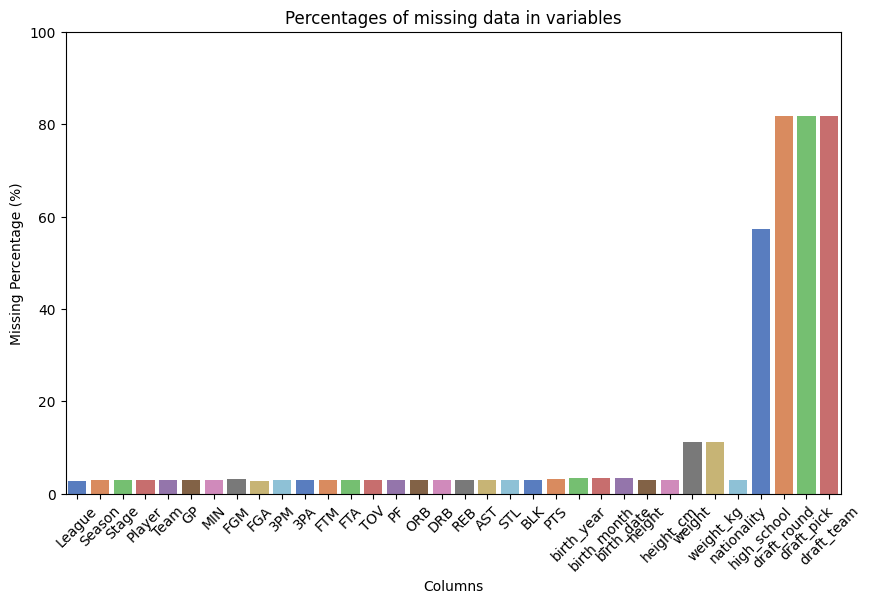

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='muted')
plt.title("Percentages of missing data in variables", fontsize=12)
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Missing Percentage (%)", fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

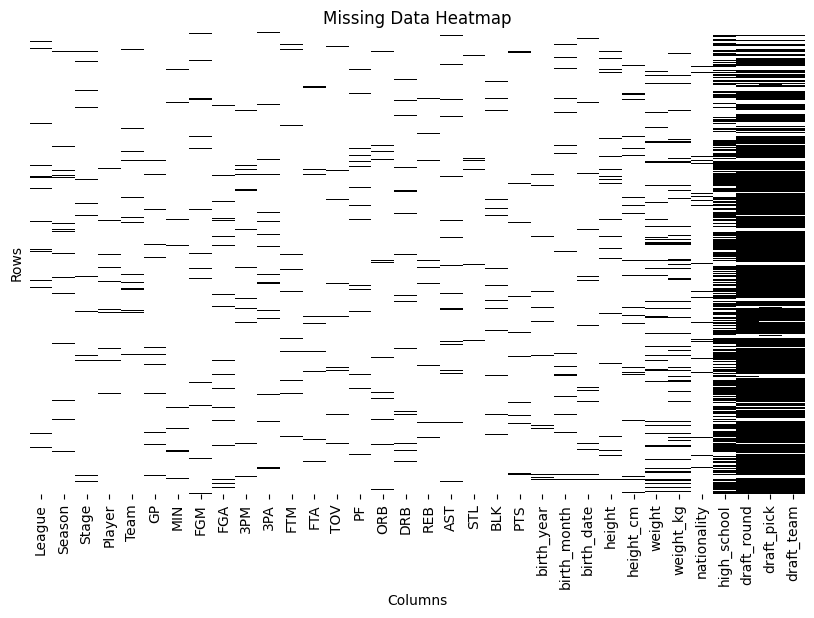

In [25]:
missing_data = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cmap="binary", cbar=False, yticklabels=False)

plt.title("Missing Data Heatmap", fontsize=12)
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Rows", fontsize=10)
plt.show()

***The purpose of visualizing these missing data was to obtain more memorable and concrete insights about our dataset.***

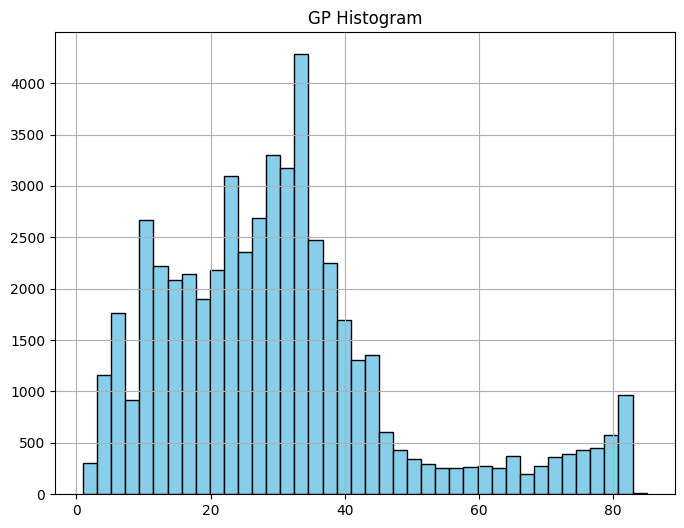

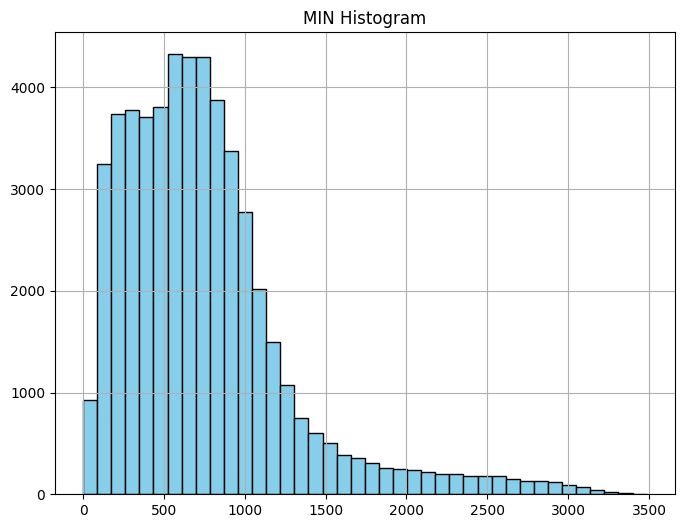

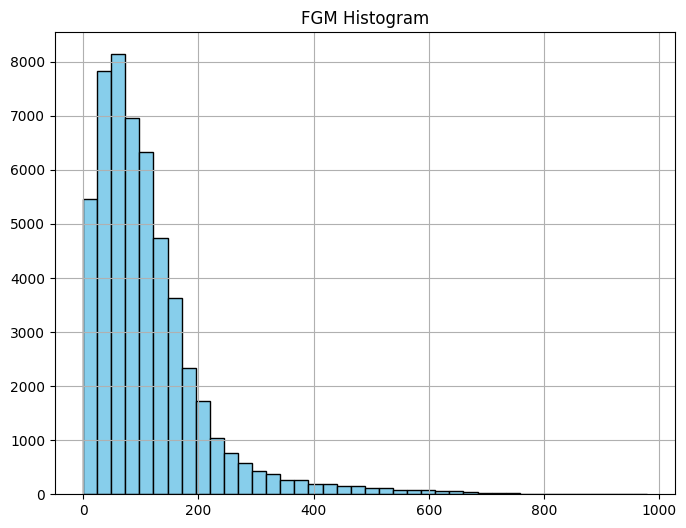

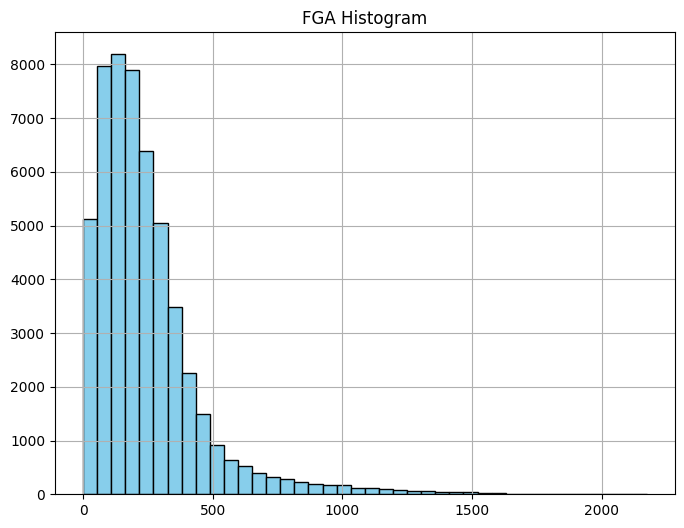

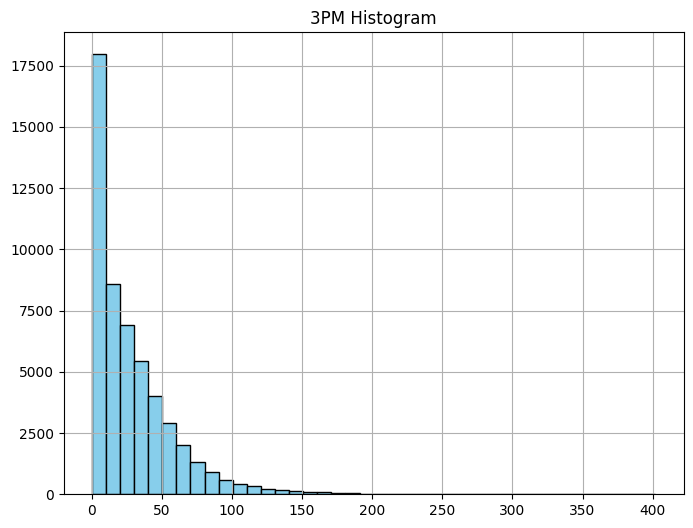

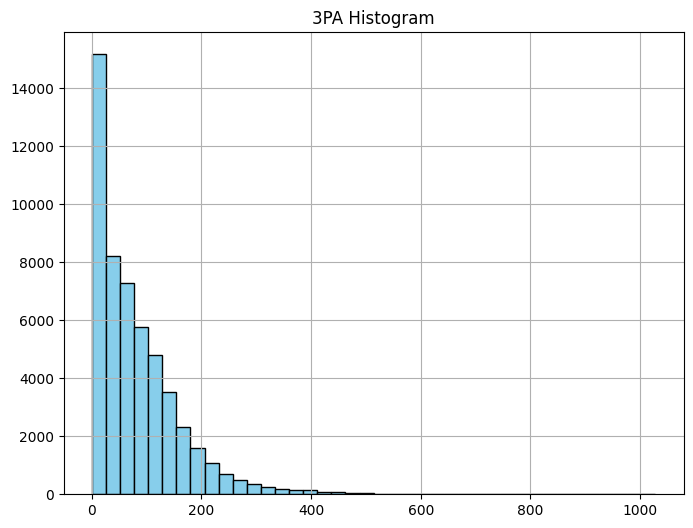

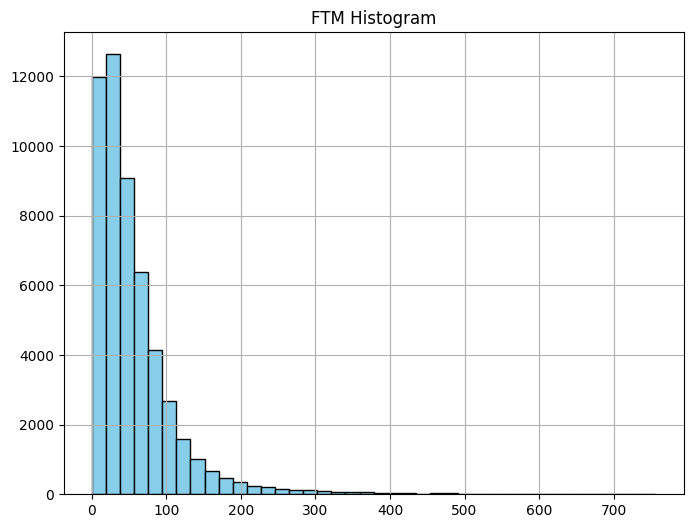

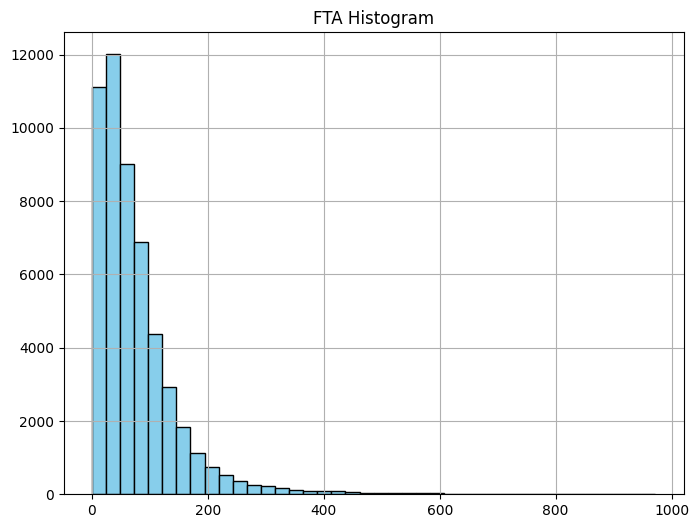

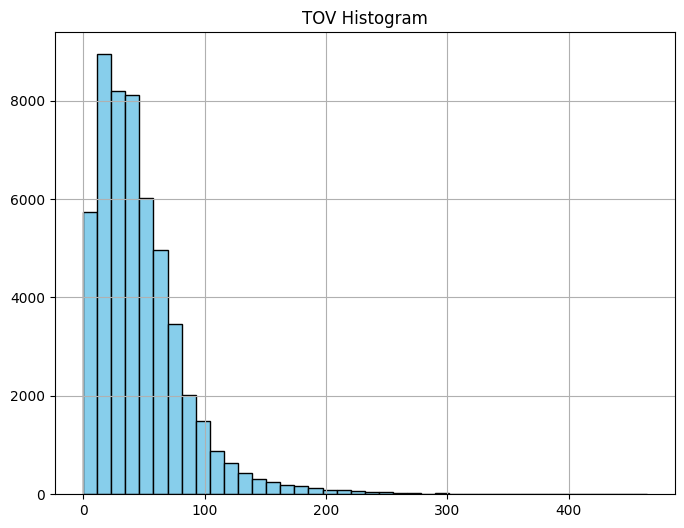

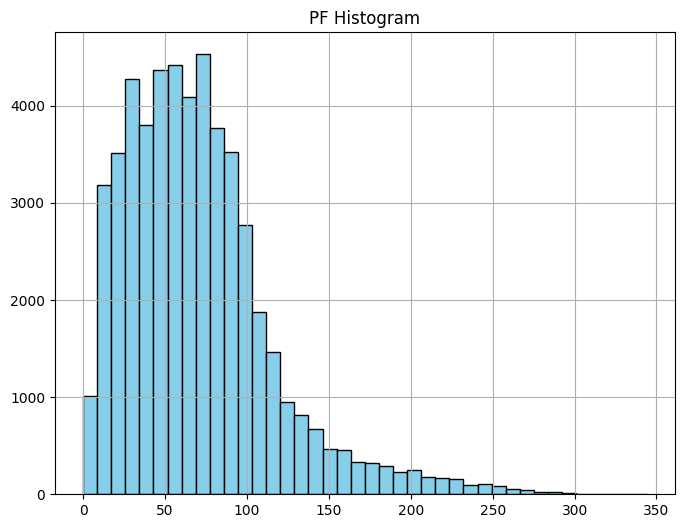

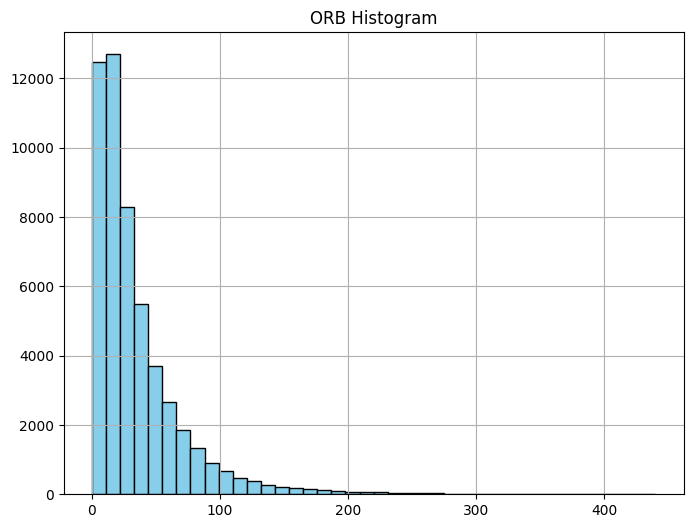

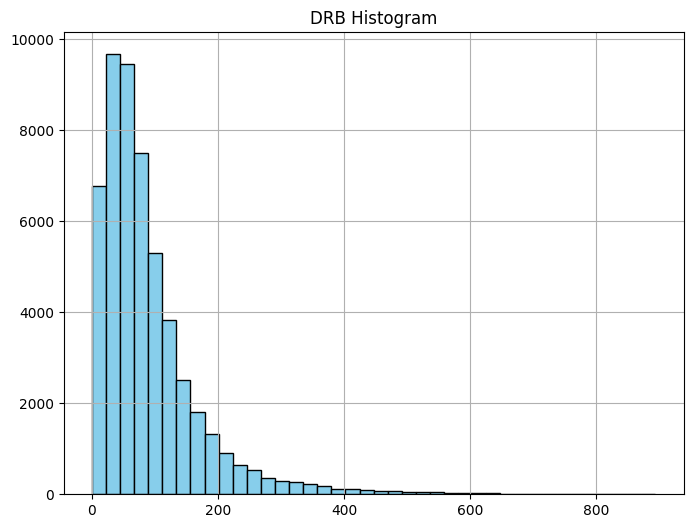

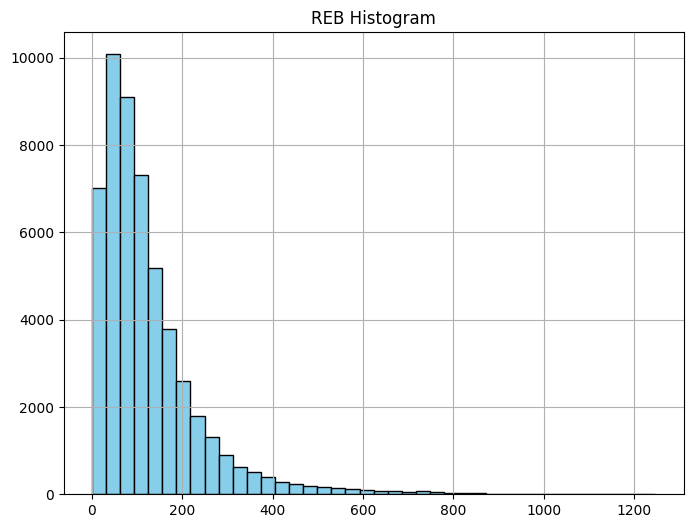

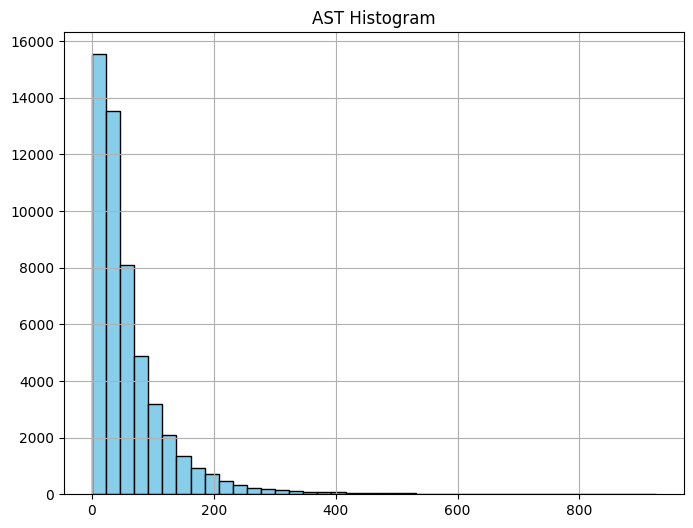

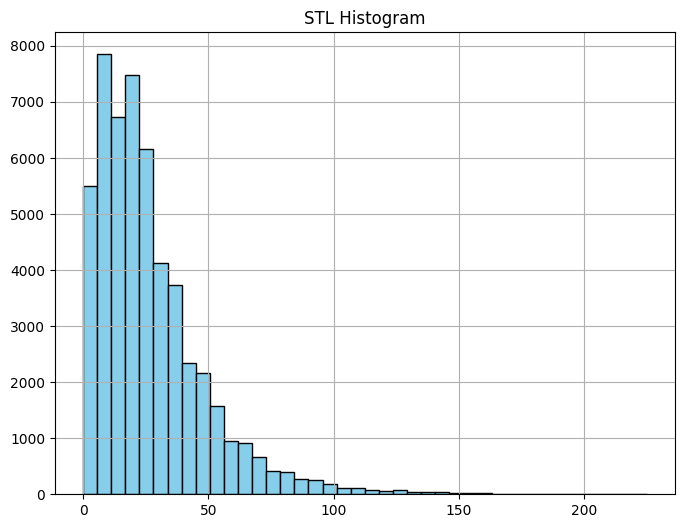

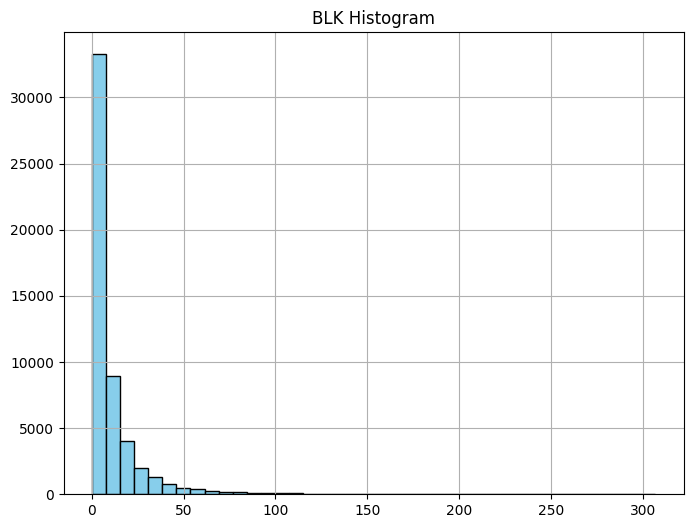

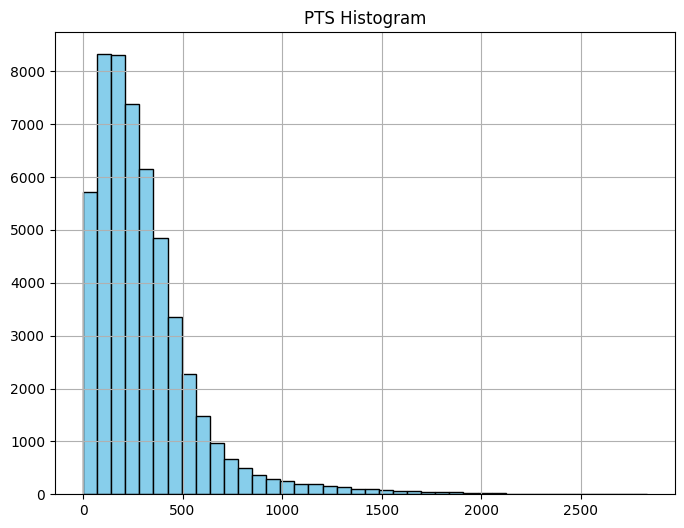

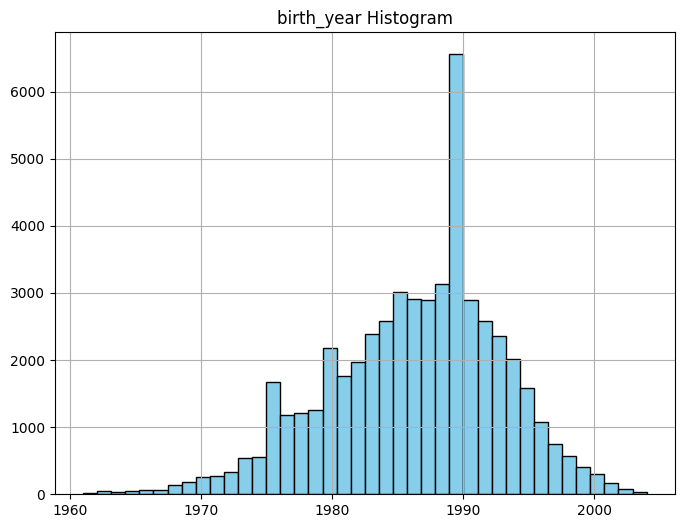

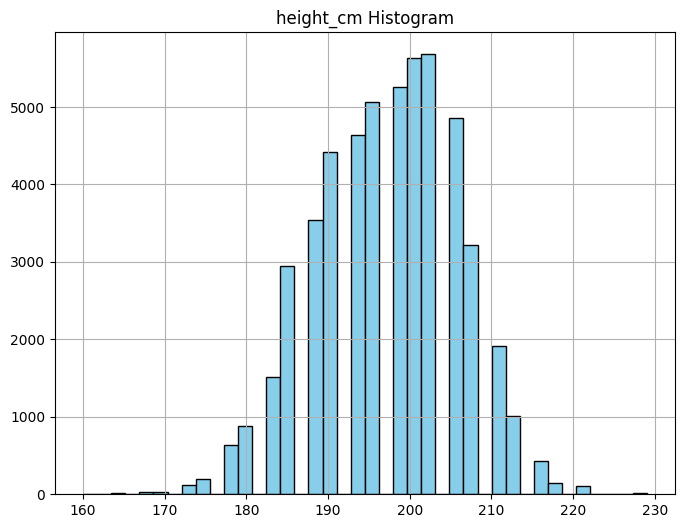

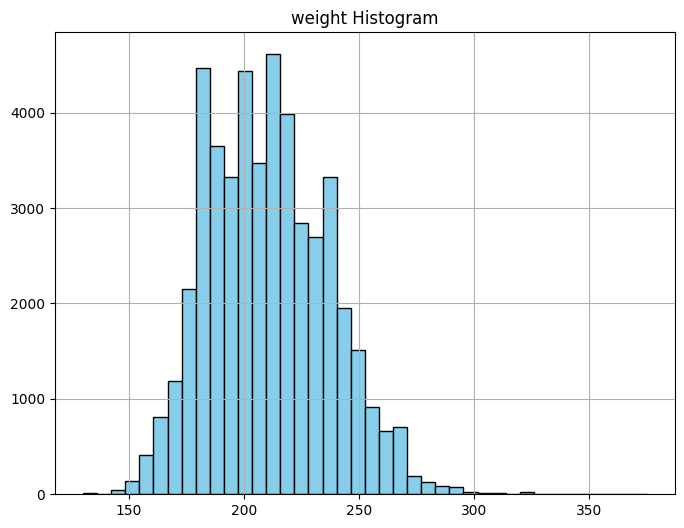

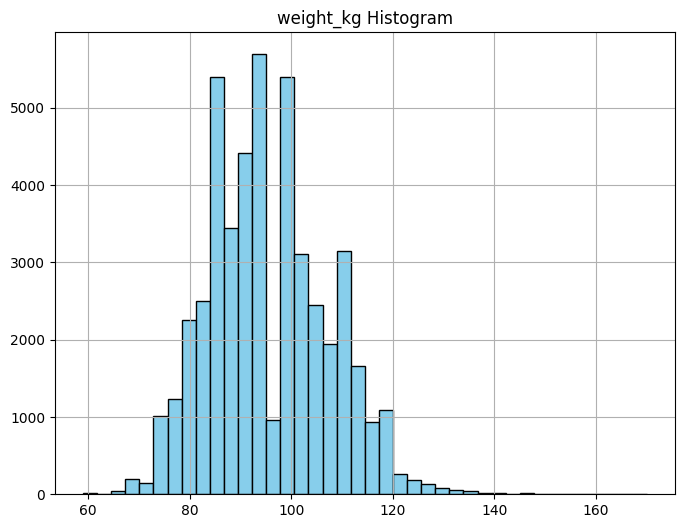

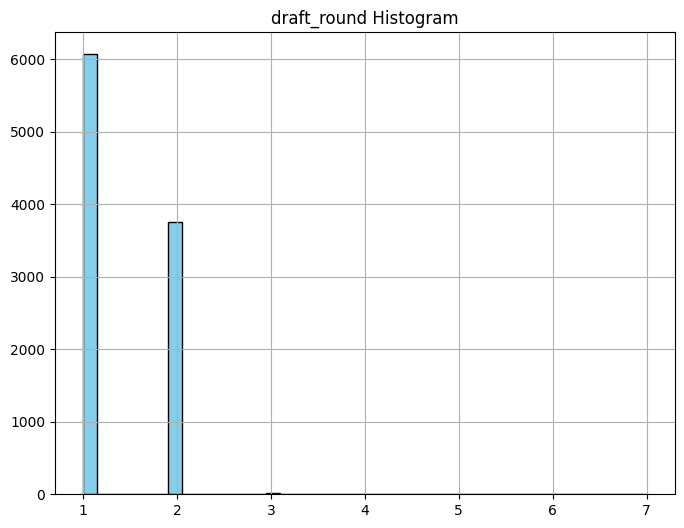

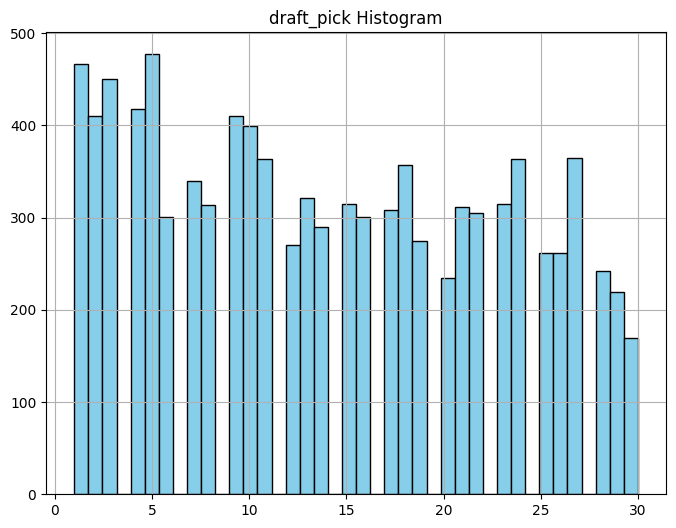

In [26]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6)) 
    df[column].hist(bins=40, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram', fontsize=12)
    plt.show()

***This was crucial for our analysis, as we filtered only numeric variables (int64 or float64), and the skewed distribution between 'GP' and 'PTS' suggests using 'median' to fill missing data, while the more centrally concentrated graphs for 'birth_year', 'weight_kg', 'weight', and 'height_cm' suggest using 'mean'.***

# **Deleting missing data**

In [27]:
df_cleaned = df.dropna(subset=['high_school', 'draft_round','draft_pick','draft_team'])

***Here, We are deleting the missing values in the variables with a large amount of missing data.***

In [28]:
df_cleaned.isnull().sum()

League         221
Season         209
Stage          219
Player         190
Team           204
GP             220
MIN            219
FGM            214
FGA            208
3PM            205
3PA            173
FTM            212
FTA            207
TOV            201
PF             223
ORB            212
DRB            210
REB            210
AST            201
STL            218
BLK            206
PTS            249
birth_year     222
birth_month    207
birth_date     186
height         233
height_cm      214
weight         213
weight_kg      228
nationality    197
high_school      0
draft_round      0
draft_pick       0
draft_team       0
dtype: int64

***Checking if the values have been deleted.***

# **Filling numerical missing data**

In [29]:
df_fillna = df_cleaned.copy()

df_fillna.head(3)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NaN,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79.0,3163.0,956.0,1665.0,0.0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82.0,3126.0,788.0,1696.0,95.0,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82.0,2947.0,752.0,1476.0,2.0,...,NaN,6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz


In [30]:
df_fillna.isnull().sum()

League         221
Season         209
Stage          219
Player         190
Team           204
GP             220
MIN            219
FGM            214
FGA            208
3PM            205
3PA            173
FTM            212
FTA            207
TOV            201
PF             223
ORB            212
DRB            210
REB            210
AST            201
STL            218
BLK            206
PTS            249
birth_year     222
birth_month    207
birth_date     186
height         233
height_cm      214
weight         213
weight_kg      228
nationality    197
high_school      0
draft_round      0
draft_pick       0
draft_team       0
dtype: int64

In [31]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6998 entries, 0 to 53776
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       6777 non-null   object 
 1   Season       6789 non-null   object 
 2   Stage        6779 non-null   object 
 3   Player       6808 non-null   object 
 4   Team         6794 non-null   object 
 5   GP           6778 non-null   float64
 6   MIN          6779 non-null   float64
 7   FGM          6784 non-null   float64
 8   FGA          6790 non-null   float64
 9   3PM          6793 non-null   float64
 10  3PA          6825 non-null   float64
 11  FTM          6786 non-null   float64
 12  FTA          6791 non-null   float64
 13  TOV          6797 non-null   float64
 14  PF           6775 non-null   float64
 15  ORB          6786 non-null   float64
 16  DRB          6788 non-null   float64
 17  REB          6788 non-null   float64
 18  AST          6797 non-null   float64
 19  STL       

***We wanted to check the variable types again because, initially, we will be filling missing data with the median, so we learned which columns we will work with.***

In [32]:
df_fillna.iloc[:, 5:22] = df_fillna.iloc[:, 5:22].apply(lambda col: col.fillna(col.median()))

df_fillna.iloc[:, 26:29] = df_fillna.iloc[:, 26:29].apply(lambda col: col.fillna(col.mean()))

df_fillna.iloc[:, 22:23] = df_fillna.iloc[:, 22:23].apply(lambda col: col.fillna(col.mean()))

df_fillna.isna().sum()

League         221
Season         209
Stage          219
Player         190
Team           204
GP               0
MIN              0
FGM              0
FGA              0
3PM              0
3PA              0
FTM              0
FTA              0
TOV              0
PF               0
ORB              0
DRB              0
REB              0
AST              0
STL              0
BLK              0
PTS              0
birth_year       0
birth_month    207
birth_date     186
height         233
height_cm        0
weight           0
weight_kg        0
nationality    197
high_school      0
draft_round      0
draft_pick       0
draft_team       0
dtype: int64

***Here, we performed the filling operation using median or mean for the columns we selected and we checked it.***

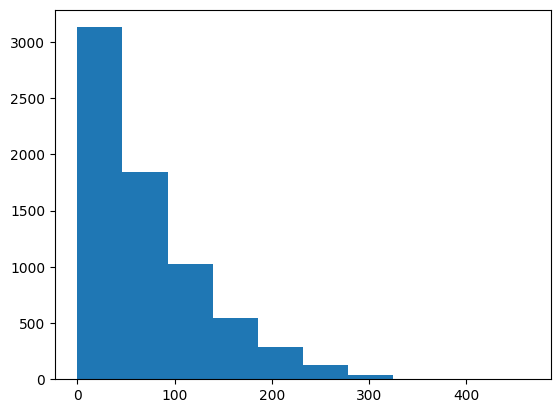

In [33]:
plt.hist(df_fillna['TOV'])
plt.show()

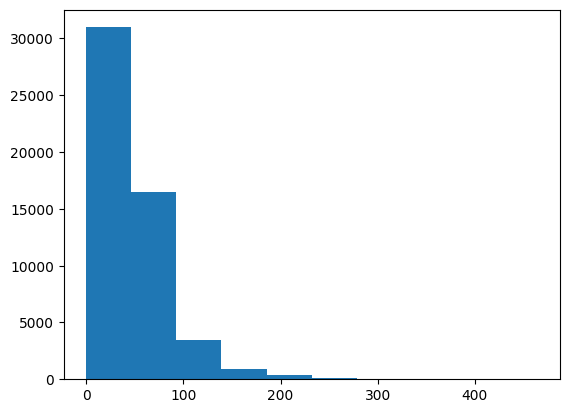

In [34]:
plt.hist(df['TOV'])
plt.show()

***We observed the data before and after the filling process. We concluded that we performed a successful analysis.***

# **Filling categorical missing data**

In [35]:
categorical_columns = df_fillna.select_dtypes(include=['object', 'category']).columns

df_fillna[categorical_columns] = df_fillna[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

df_fillna.isna().sum()

League         0
Season         0
Stage          0
Player         0
Team           0
GP             0
MIN            0
FGM            0
FGA            0
3PM            0
3PA            0
FTM            0
FTA            0
TOV            0
PF             0
ORB            0
DRB            0
REB            0
AST            0
STL            0
BLK            0
PTS            0
birth_year     0
birth_month    0
birth_date     0
height         0
height_cm      0
weight         0
weight_kg      0
nationality    0
high_school    0
draft_round    0
draft_pick     0
draft_team     0
dtype: int64

***We listed my variables with the 'object' data type as categorical_columns. Then, We filled them using 'mode'.***

In [36]:
df[["League"]][:5]

,League
0,NaN
1,NBA
2,NBA
3,NBA
4,NaN


In [37]:
df_fillna[["League"]][:5]

,League
0,NBA
1,NBA
2,NBA
4,NBA
5,NBA


***In the first row, the 'League' field was 'NaN' (missing data), but we filled it with 'NBA' using 'mode'.***

# **Categorical data analysis**

In [38]:
df_fillna['League'].value_counts()

League
NBA                                   5478
Euroleague                             330
Eurocup                                237
Spanish-ACB                            135
Italian-Lega-Basket-Serie-A            130
Chinese-CBA                            120
German-BBL                              83
Turkish-BSL                             78
Australian-NBL                          78
French-Jeep-Elite                       67
Israeli-BSL                             44
Greek-HEBA-A1                           31
Japanese-BLeague                        30
Argentinian-Liga-A                      18
Lithuanian-LKL                          16
FIBA-Europe-Cup                         16
South-Korean-KBL                        14
Lebanese-Division-A                     13
Polish-TBL                              11
Serbian-KLS                             10
Ukrainian-Superleague                    9
Croatian-A-1-Liga                        8
Bulgarian-NBL                            6
Cana

In [39]:
df_fillna['League'].value_counts(normalize=True) * 100

League
NBA                                   78.279508
Euroleague                             4.715633
Eurocup                                3.386682
Spanish-ACB                            1.929123
Italian-Lega-Basket-Serie-A            1.857674
Chinese-CBA                            1.714776
German-BBL                             1.186053
Turkish-BSL                            1.114604
Australian-NBL                         1.114604
French-Jeep-Elite                      0.957416
Israeli-BSL                            0.628751
Greek-HEBA-A1                          0.442984
Japanese-BLeague                       0.428694
Argentinian-Liga-A                     0.257216
Lithuanian-LKL                         0.228637
FIBA-Europe-Cup                        0.228637
South-Korean-KBL                       0.200057
Lebanese-Division-A                    0.185767
Polish-TBL                             0.157188
Serbian-KLS                            0.142898
Ukrainian-Superleague            

In [40]:
categorical_columns = df_fillna.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f'{col} - Value Counts:\n', df_fillna[col].value_counts())
    print(5 * "*********")

League - Value Counts:
 League
NBA                                   5478
Euroleague                             330
Eurocup                                237
Spanish-ACB                            135
Italian-Lega-Basket-Serie-A            130
Chinese-CBA                            120
German-BBL                              83
Turkish-BSL                             78
Australian-NBL                          78
French-Jeep-Elite                       67
Israeli-BSL                             44
Greek-HEBA-A1                           31
Japanese-BLeague                        30
Argentinian-Liga-A                      18
Lithuanian-LKL                          16
FIBA-Europe-Cup                         16
South-Korean-KBL                        14
Lebanese-Division-A                     13
Polish-TBL                              11
Serbian-KLS                             10
Ukrainian-Superleague                    9
Croatian-A-1-Liga                        8
Bulgarian-NBL          

 
***We can make many conclusions from here, for example: 1. The team with the most drafts is Boston Celtics. 2. The college with the most players sent is OAK Hill Academy. 3. Most players in the NBA are from the United States.***


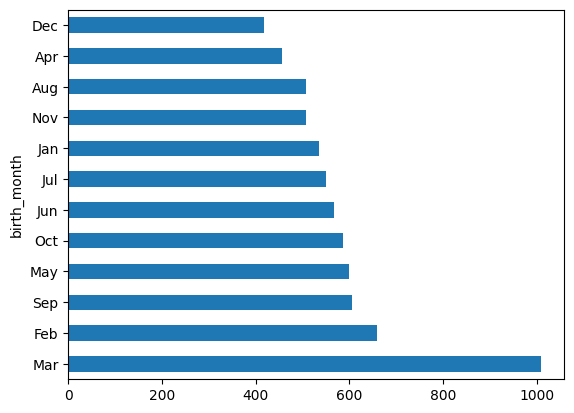

In [42]:
df_fillna['birth_month'].value_counts().plot.barh();

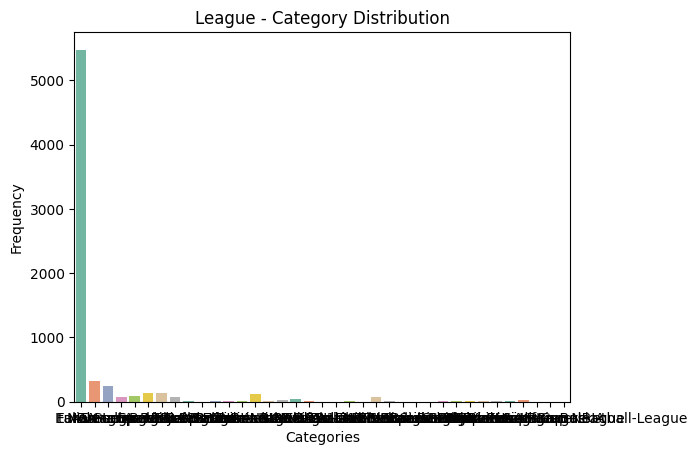

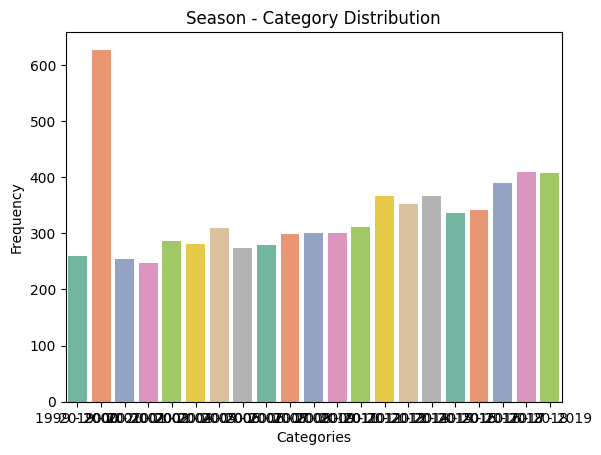

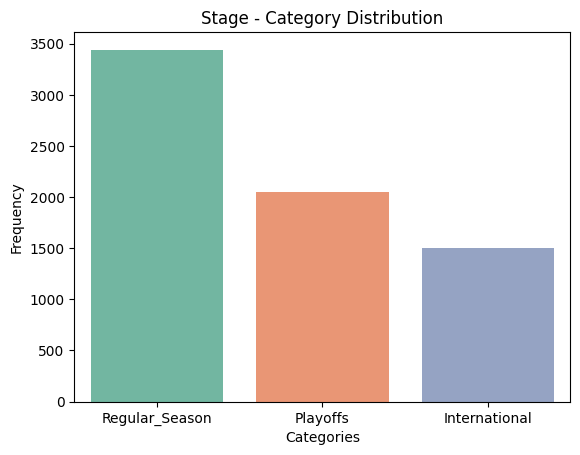

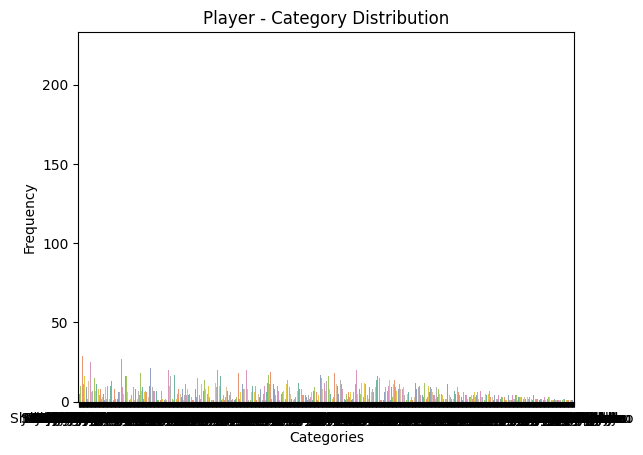

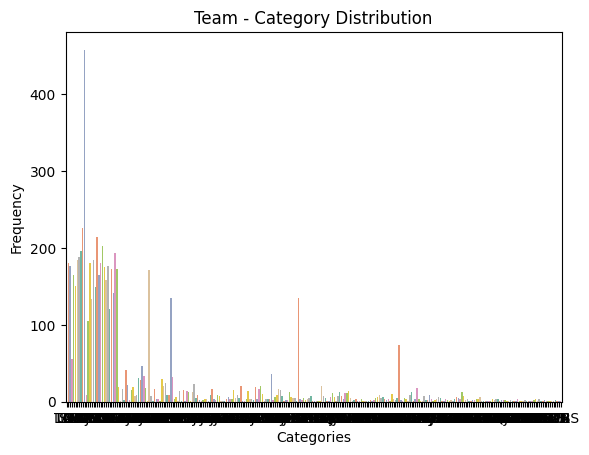

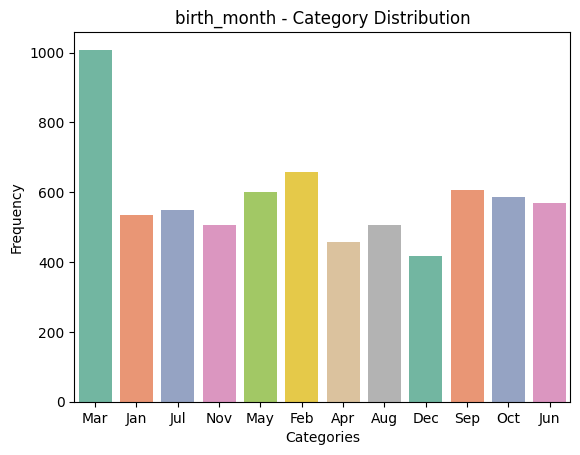

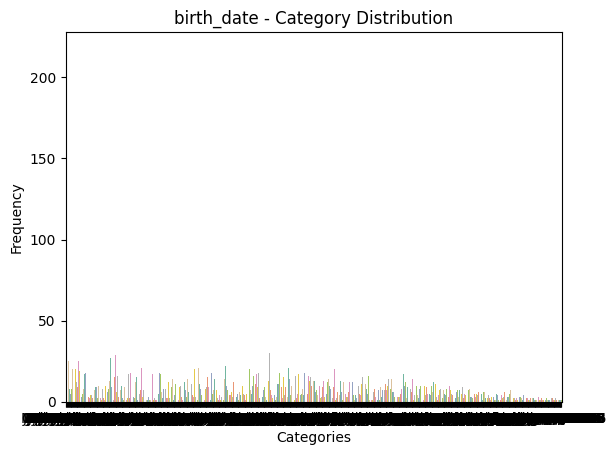

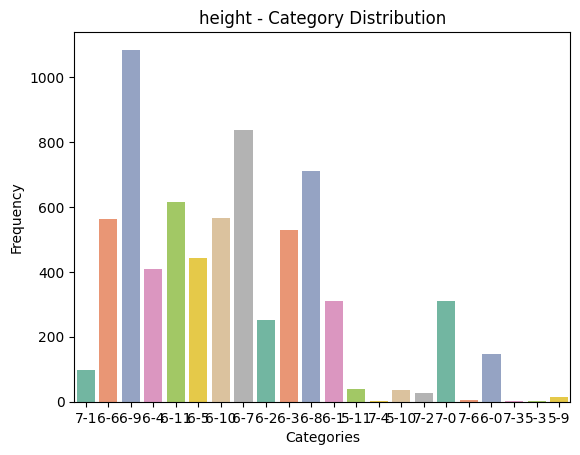

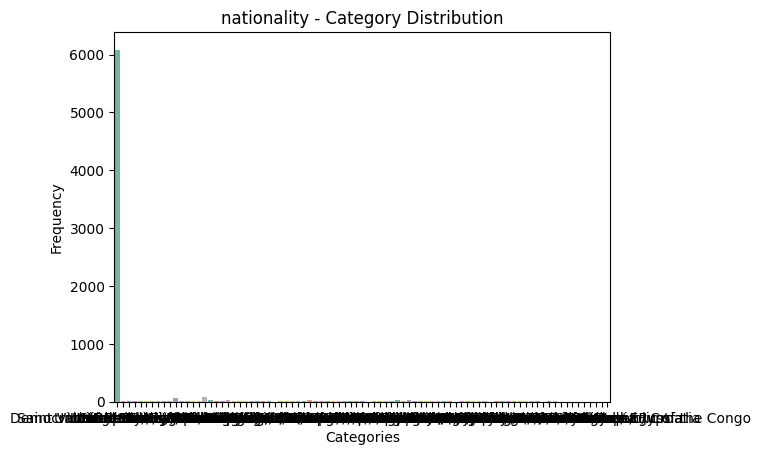

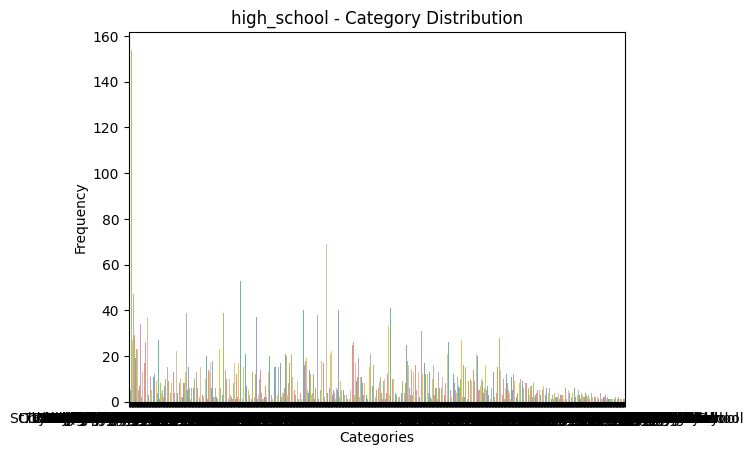

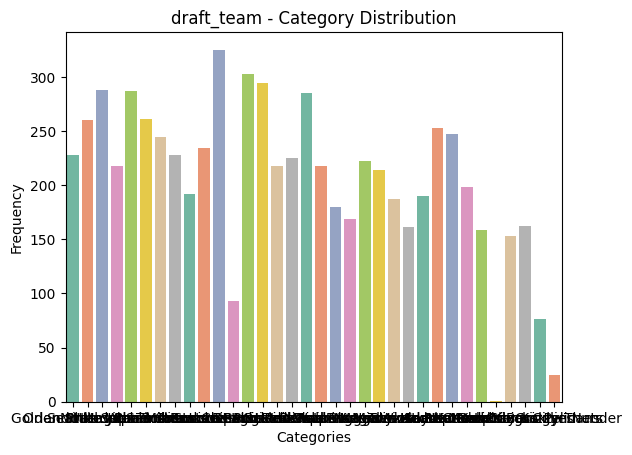

In [43]:
for col in categorical_columns:
    sns.countplot(data=df_fillna, x=col, palette='Set2')
    plt.title(f'{col} - Category Distribution')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

***Here, we examined the graphs of each of them.***